In [1]:
! pip install snscrape

  Using cached snscrape-0.6.2.20230320-py3-none-any.whl (71 kB)


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [7]:
query = "web scraping"
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    print(vars(tweet))
    break

{'url': 'https://twitter.com/Gxpx5/status/1644023725279289376', 'date': datetime.datetime(2023, 4, 6, 17, 6, 15, tzinfo=datetime.timezone.utc), 'rawContent': '@nextspaceflight Web scraping?', 'renderedContent': '@nextspaceflight Web scraping?', 'id': 1644023725279289376, 'user': User(username='Gxpx5', id=1319365779188518913, displayname='Gxpx', rawDescription='', renderedDescription='', descriptionLinks=None, verified=False, created=datetime.datetime(2020, 10, 22, 19, 51, 39, tzinfo=datetime.timezone.utc), followersCount=20, friendsCount=91, statusesCount=2223, favouritesCount=8761, listedCount=1, mediaCount=124, location='', protected=False, link=None, profileImageUrl='https://pbs.twimg.com/profile_images/1340418103776342018/OufzniAE_normal.jpg', profileBannerUrl=None, label=None), 'replyCount': 0, 'retweetCount': 0, 'likeCount': 0, 'quoteCount': 0, 'conversationId': 1644020045260156929, 'lang': 'en', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',

In [3]:
limit = 10000
ab_tweets = []

In [4]:
query = '(abortion OR miscarriage) until:2023-04-10 since:2022-10-27'

In [5]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(ab_tweets) == limit:
        break
    else:
        ab_tweets.append([tweet.date, tweet.user.username, tweet.content,
                       tweet.retweetCount, tweet.likeCount, tweet.replyCount,
                       tweet.user.followersCount])

/var/folders/8q/bq8pw32x58s8y8_tnlr5dyvm0000gn/T/ipykernel_60227/2476627241.py:5: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  ab_tweets.append([tweet.date, tweet.user.username, tweet.content,


In [7]:
df_abortion = pd.DataFrame(ab_tweets, columns=['Date', 'User', 'Tweet', 'retweetCount', 'likeCount', 'replyCount', 'followersCount'])

In [8]:
df_abortion

,Date,User,Tweet,retweetCount,likeCount,replyCount,followersCount
0,2023-04-09 23:59:59+00:00,Cynthia04784679,@PLLibertarian @warinutah @BrainyFlatus @JoJoF...,0,1,1,684
1,2023-04-09 23:59:52+00:00,SweetLila5433,@LifeNewsHQ There is much pain with an abortio...,0,0,0,10
2,2023-04-09 23:59:50+00:00,LittleMammith,"Hearing a lot about how abortion bans affect ""...",3,58,1,553
3,2023-04-09 23:59:47+00:00,LJLMETAL,@jilevin Abortion is another sad step in today...,0,0,0,2228
4,2023-04-09 23:59:45+00:00,TaytayDoles,@Pullma_Pfanger @FoxNews Actually it’s abortio...,0,0,0,208
...,...,...,...,...,...,...,...
9995,2023-04-09 16:38:53+00:00,kukuu_gh,@AmaSweetPussy1 Abortion pill 💊,0,0,0,73
9996,2023-04-09 16:38:52+00:00,polishkafka0,@kishGauss @JeremyWard33 We have abortion bans...,0,0,1,5
9997,2023-04-09 16:38:50+00:00,SainzYosi,"Why Alexandria Cortez Holy Spirit where Eva, b...",0,0,1,82
9998,2023-04-09 16:38:48+00:00,devynmeds_,Up,0,0,0,187


In [23]:
df_abortion['Tweet'][114]

'@yesnicksearcy "We are at an inflection point in the life of our democracy, the apathy toward abortion cannot persist. We can no longer accept the status quo that elevates Planned Parenthood above the safety of our unborn children."'

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_cont = df_abortion[['retweetCount', 'likeCount', 'replyCount','followersCount']]

In [19]:
df_corr = df_cont.corr()

<Axes: >

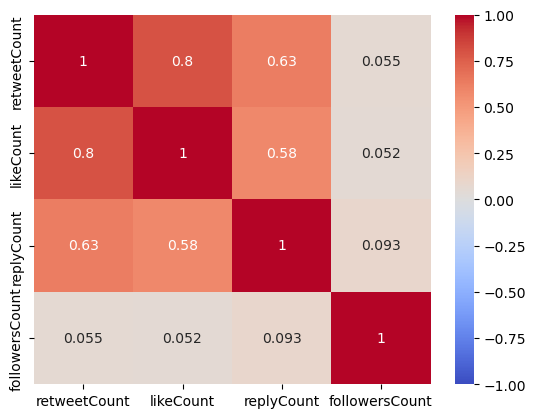

In [20]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

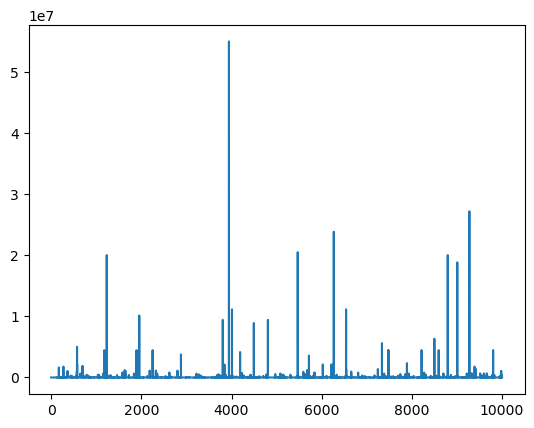

In [15]:
plt.plot(df_abortion['followersCount'])

In [54]:
import regex as re
import contractions

In [65]:
def clean_tweet(df):
# make all text lowercase
    tweet = df['Tweet'].str.lower()
    clean_text = []

    # clean text
    for t in tweet:
        # remove \n
        clean_t = re.sub(r"\n", " ", t)
        # remove @account
        clean_t = re.sub(r"@[^\s]+", "", clean_t)
        # remove hashtag
        clean_t = re.sub(r"#", "", clean_t)
        # remove urls
        clean_t = re.sub(r"(www[^\s]+) | (http[^\s]+)", "", clean_t)
        # remove &amp
        clean_t = re.sub(r"&amp", "", clean_t)
        # fix contractions
        clean_t = contractions.fix(clean_t)
        # remove punctuations
        clean_t = re.sub("[^a-z0-9]", " ", clean_t)
        # remove numbers
        clean_t = re.sub(r"\d+", "", clean_t)
    
        clean_text.append(clean_t)
    
    df['clean_tweet'] = clean_text

In [66]:
clean_tweet(df_abortion)

In [75]:
df_abortion['Tweet'][5]

'@catturd2 @Steph93065In21 @gatewaypundit Presler did great job, but Kelly was a weak candidate who said he didn’t want Trump’s endorsement, and abortion issue is problematic. Other races did well. Senate now can impeach with super majority. Cheap shot.'

In [69]:
df_abortion['clean_tweet']

0                       which god  some allow abortion 
1     leftist activist governor whitmer strikes  abo...
2                           against a and pro abortion 
3                                         shame on you 
4      it is not a coincidence that most of them jus...
                            ...                        
95      the democrats would let kill their own voter...
96     its still a problem though   the issue is the...
97      interesting that all this concern allowed a ...
98     are people protesting at the judge s house  d...
99      abortion is worth the entire margin  the  qu...
Name: clean_tweet, Length: 100, dtype: object